In [1]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F

from sdlbfgs import *
from helpers_opt_parameters import *

In [2]:
a = [2,3]
np.savetxt('b.txt',a)

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [4]:
trainset = datasets.FashionMNIST('', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [5]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


In [6]:
print(valloader)
len(valloader)

157

64 images in each batch and each image has a dimension of 28 x 28 pixels


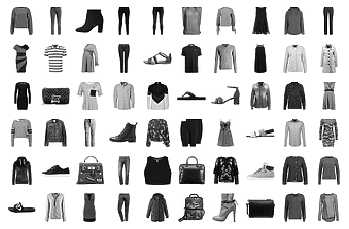

In [7]:
# A subset of a batch is plotted to show a sample of the dataset. 
dataiter = iter(trainloader)
images, labels = dataiter.next()
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Neural Network 

### Model definition
The model is defined, specifying the structure of the neural network.

### Model A: FCNN
Fully connected neural network, with hidden layer structure through vector *hidden_sizes*.

In [8]:
# Input and output sizes and network structure are defined.
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
modelA=fully_connected_NN(sizes)
print(modelA)

# Loss of the model is defined.
criterion = nn.NLLLoss()

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


### Model B: CNN
Convolutional neural network composed of two convolutional layers and two fully connected layers.

In [14]:
# The size of the images is computed.
images,_=dataiter.next()
image_size=images[0].shape[1]
# Using nn.CrossEntropyLoss allows to avoid specifying LogSoftmax as final layer.
criterion = nn.CrossEntropyLoss()
# Depending on the size of the image, a CNN model is built.
modelB=ConvNet(image_size)
print(modelB)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=10, bias=True)
)


### Training


### Test
The trained model is used to predict the labels of the test set, and the model performance is evaluated.

In [0]:
# Accuracy obtained for FCNN
accuracy = accuracy_test(valloader, model)

In [0]:
# Accuracy obtained for CNN
accuracy=accuracy_test_CNN(valloader,modelB)

## SdLBFGS

### Fully connected network

In [15]:
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# The model is built
model=fully_connected_NN(sizes)
# Loss of the model is defined.
criterion = nn.NLLLoss()

method = "SdLBFGS"
optimizer = SdLBFGS(model.parameters())

epochs = 30
train_losses_fcnn, test_losses_fcnn, train_accuracy_fcnn, test_accuracy_fcnn, training_time_fcnn = optimize(optimizer, epochs, trainloader, valloader, model, criterion , method )


Epoch 0
Training loss: 0.4729530437192175
Number Of Images Tested = 10000
Model Accuracy = 0.84
Number Of Images Tested = 60000
Model Accuracy = 0.8594833333333334
Test loss: 0.4541479273206869 

Epoch 1
Training loss: 0.3783400763374275
Number Of Images Tested = 10000
Model Accuracy = 0.8526
Number Of Images Tested = 60000
Model Accuracy = 0.8711833333333333
Test loss: 0.42099339738013636 

Epoch 2
Training loss: 0.357363991677634
Number Of Images Tested = 10000
Model Accuracy = 0.8509
Number Of Images Tested = 60000
Model Accuracy = 0.8728833333333333
Test loss: 0.41191368023301383 

Epoch 3
Training loss: 0.34692491993689334
Number Of Images Tested = 10000
Model Accuracy = 0.8567
Number Of Images Tested = 60000
Model Accuracy = 0.8787166666666667
Test loss: 0.39440831542015076 

Epoch 4
Training loss: 0.33766266924422433
Number Of Images Tested = 10000
Model Accuracy = 0.8601
Number Of Images Tested = 60000
Model Accuracy = 0.8826166666666667
Test loss: 0.38440798868419257 

Epoch 5

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
np.savetxt('SdLBFGS_fcNN_trainloss.txt', train_losses_fcnn)
np.savetxt('SdLBFGS_fcNN_testloss.txt', test_losses_fcnn)
np.savetxt('SdLBFGS_fcNN_trainacc.txt', train_accuracy_fcnn)
np.savetxt('SdLBFGS_fcNN_testacc.txt', test_accuracy_fcnn)


In [ ]:
plt.figure(1, figsize = (12,10))
plt.plot(test_losses_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SdLBFGS Test loss in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_loss_fcnn.jpg")

plt.figure(2, figsize = (12,10))
plt.plot(train_losses_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SdLBFGS Train loss in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_loss_fcnn.jpg")

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SdLBFGS Train accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_accuracy_fcnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SdLBFGS Test accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_accuracy_fcnn.jpg")


In [ ]:

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SdLBFGS Train accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_accuracy_fcnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_fcnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SdLBFGS Test accuracy in FCNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_accuracy_fcnn.jpg")

### CNN

In [9]:
input_size = 784
output_size = 10
sizes = [input_size,128,64,output_size]

# Model building
# The size of the images is computed.
images,_=dataiter.next()
image_size=images[0].shape[1]
# Using nn.CrossEntropyLoss allows to avoid specifying LogSoftmax as final layer.
criterion = nn.CrossEntropyLoss()
modelB=ConvNet(image_size)


method = "SdLBFGS"
optimizer = SdLBFGS(modelB.parameters(), history_size = 50)

epochs = 10

train_losses_cnn, test_losses_cnn, train_accuracy_cnn, test_accuracy_cnn, training_time_cnn = optimize_CNN(optimizer, epochs, trainloader, valloader, modelB, criterion , method )



Epoch 0
Training loss: 0.46834082532920307
Number Of Images Tested = 10000
Model Accuracy = 0.871
Number Of Images Tested = 60000
Model Accuracy = 0.8802833333333333
Test loss: 0.36346791357181635 

Epoch 1
Training loss: 0.29420166901910483
Number Of Images Tested = 10000
Model Accuracy = 0.8876
Number Of Images Tested = 60000
Model Accuracy = 0.9020333333333334
Test loss: 0.3159310691485739 

Epoch 2
Training loss: 0.26213787926603227
Number Of Images Tested = 10000
Model Accuracy = 0.8941
Number Of Images Tested = 60000
Model Accuracy = 0.91065
Test loss: 0.2955911612244928 

Epoch 3
Training loss: 0.24820838786010294
Number Of Images Tested = 10000
Model Accuracy = 0.9005
Number Of Images Tested = 60000
Model Accuracy = 0.91555
Test loss: 0.2844968945926921 

Epoch 4
Training loss: 0.23672803243927992
Number Of Images Tested = 10000
Model Accuracy = 0.9026
Number Of Images Tested = 60000
Model Accuracy = 0.9187333333333333
Test loss: 0.2786180048136954 

Epoch 5
Training loss: 0.22

KeyboardInterrupt: 

In [ ]:
np.savetxt('SdLBFGS_CNN_trainloss.txt', train_losses_cnn)
np.savetxt('SdLBFGS_CNN_testloss.txt', test_losses_cnn)
np.savetxt('SdLBFGS_CNN_trainacc.txt', train_accuracy_cnn)
np.savetxt('SdLBFGS_CNN_testacc.txt', test_accuracy_cnn)


In [ ]:
training_time_cnn


In [ ]:
plt.figure(1, figsize = (12,10))
plt.plot(test_losses_cnn)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('SdLBFGS Test loss in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_loss_cnn.jpg")

plt.figure(2, figsize = (12,10))
plt.plot(train_losses_cnn)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('SdLBFGS Train loss in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_loss_cnn.jpg")

plt.figure(3, figsize = (12,10))
plt.plot(train_accuracy_cnn)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('SdLBFGS Train accuracy in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_train_accuracy_cnn.jpg")

plt.figure(4, figsize = (12,10))
plt.plot(test_accuracy_cnn)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('SdLBFGS Test accuracy in CNN',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("SdLBFGS_test_accuracy_cnn.jpg")